##### Dataset Info:
**Sample Data Set containing Telco customer data and showing customers left last month**

In [1]:
#importing required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Loading Data file
telco_df=pd.read_csv(r"C:\Users\ishita\Downloads\Churn.csv")

In [3]:
#top 5 rows of data
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
telco_df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [6]:
#Check the various attributes of data like shape, datatypes
telco_df.shape

(7043, 21)

In [7]:
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#checking the datatypes of all the columns
telco_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
#checkin the discriptive statistice of numeric variables
telco_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


* SeneionCitizen is actually a categorical hence the 25%-50%-70% distribution is not proper.
* 75% customers have tanure less than 55 months
* Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

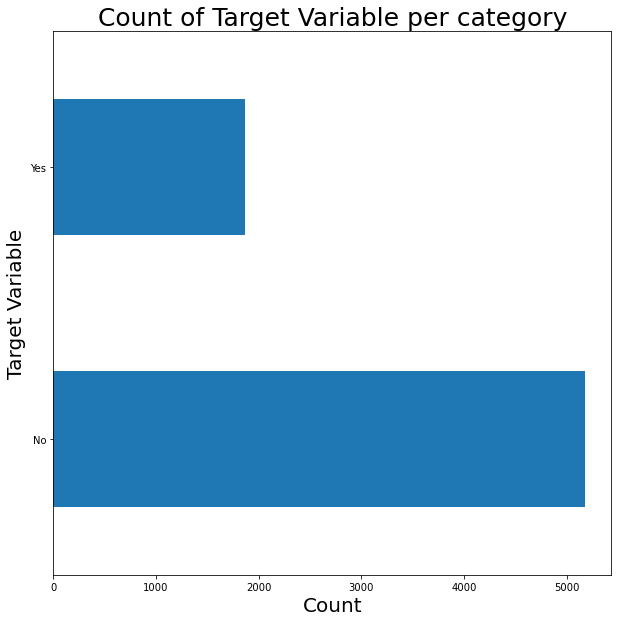

In [10]:
telco_df['Churn'].value_counts().plot(kind='barh', figsize=(10,10))
plt.xlabel("Count",fontsize=20)
plt.ylabel("Target Variable",fontsize=20)
plt.title("Count of Target Variable per category", fontsize=25);

In [11]:
telco_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
100*telco_df['Churn'].value_counts()/len(telco_df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

* Data is highly imbalanced, ratio=73:27
* So we analyse the data with other features while taking the target values sseperately to get some insights.

In [13]:
#Concise Summary of the dataframe, as we have too many columns, we are using the verbose=True mode
telco_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


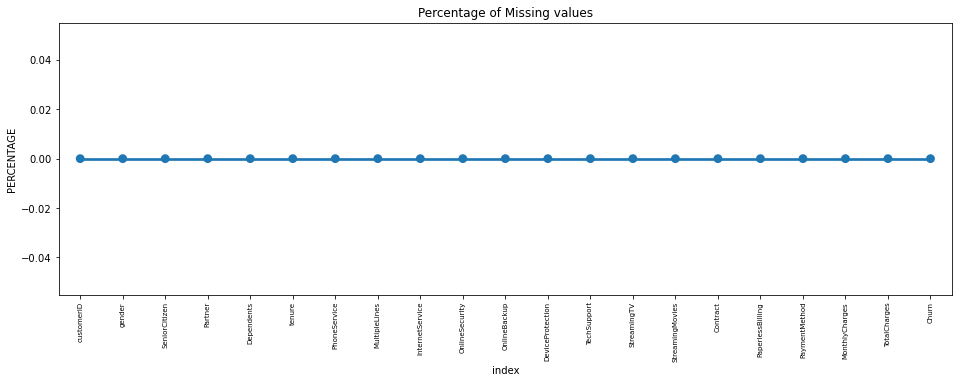

In [14]:
missing = pd.DataFrame((telco_df.isnull().sum())*100/telco_df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

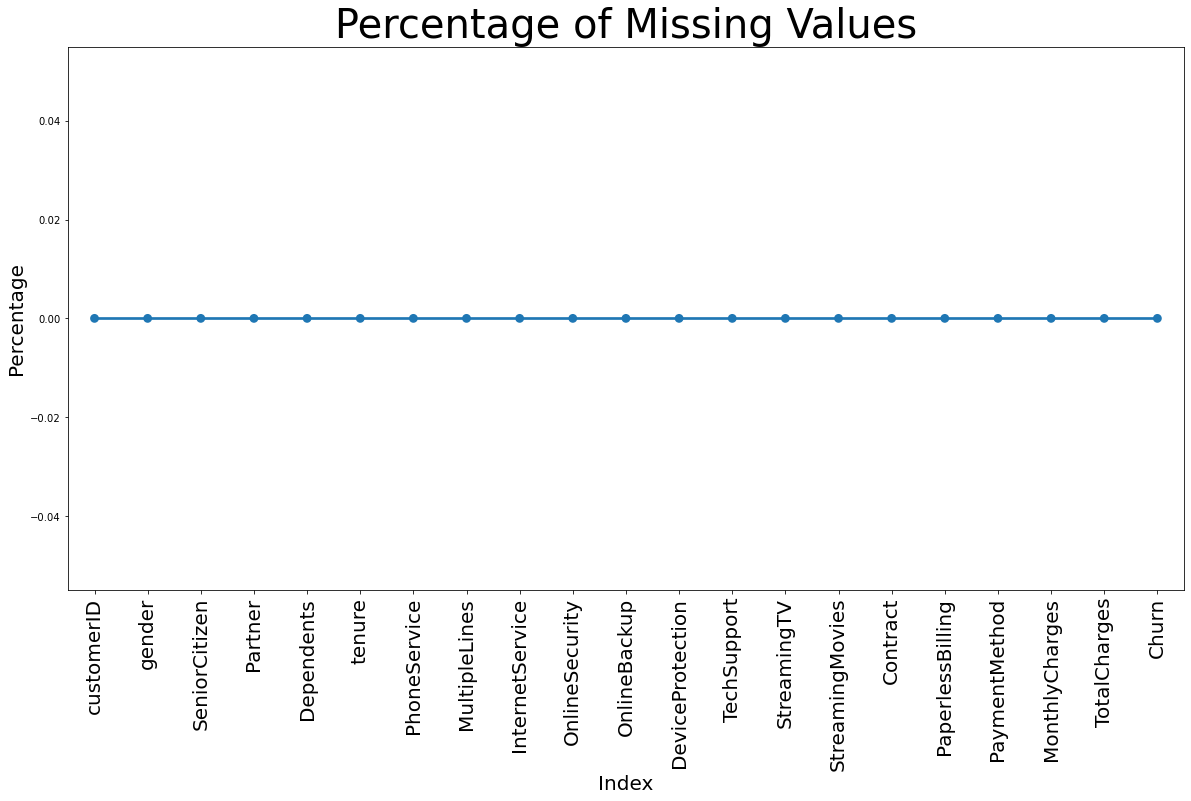

In [15]:
missing= pd.DataFrame((telco_df.isnull().sum())*100/telco_df.shape[0]).reset_index()
plt.figure(figsize=(20,10))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90, fontsize=20)
plt.title("Percentage of Missing Values",fontsize=40)
plt.ylabel("Percentage",fontsize=20)
plt.xlabel('Index',fontsize=20)
plt.show()

#### Missing Data - Initial Intuition

* Here, we don't have any missing data.

## Data Cleaning

**1.** **Create a copy of base data for manupulation and processing**

In [16]:
telco_df_copy=telco_df.copy()

**2. TotalCharges should be numeric. Let's convert it to numerical data type.**

In [17]:
telco_df_copy['TotalCharges']=pd.to_numeric(telco_df_copy['TotalCharges'], errors='coerce')

In [18]:
telco_df_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**3. As we can see there are 11 missing values in TotalCharges column. Let's check these records.**

In [19]:
telco_df_copy.loc[telco_df_copy['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


**4. Missing Value Treatement**

**Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.**

In [20]:
# Removing the missing values
telco_df_copy.dropna(how='any',inplace=True)

In [21]:
#checking after removing missing values
telco_df_copy.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
telco_df_copy['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

**5. Divide customers into bins based on tenure e.g. for tenure <12 months: assign a tenure group if 1-12, for tenure between 1 to 2 years, tenure group of 13-24, and so on..**

In [23]:
# Max tenure
print(telco_df_copy.tenure.max())

72


In [24]:
#Group the tenture in bins of 12 months
labels=["{0}-{1}".format(i,i+11) for i in range(1,72,12)]
print(labels)
telco_df_copy['tenure_group']=pd.cut(telco_df_copy.tenure, range(1,80,12), right=False, labels=labels)
telco_df_copy.tenure_group.value_counts()

['1-12', '13-24', '25-36', '37-48', '49-60', '61-72']


1-12     2175
61-72    1407
13-24    1024
49-60     832
25-36     832
37-48     762
Name: tenure_group, dtype: int64

**6. Now I will remove columns which are not required for processing**

In [25]:
#drop columns customerID and tenure
telco_df_copy.drop(columns=['customerID','tenure'],axis=1, inplace=True)
telco_df_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


## Data Exploration
**1. Plot distribution of individual predictors by Churn**

### Univariate Analysis

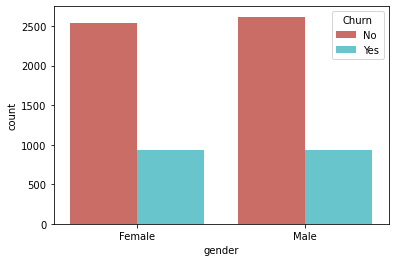

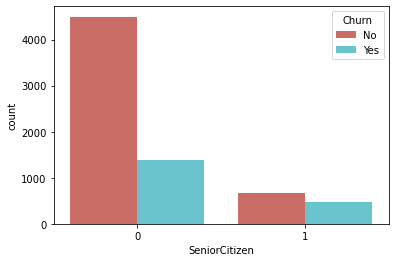

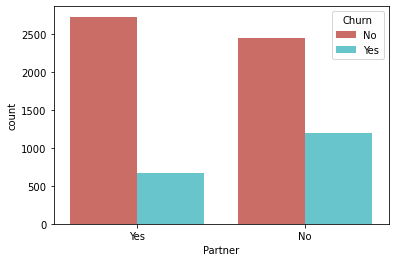

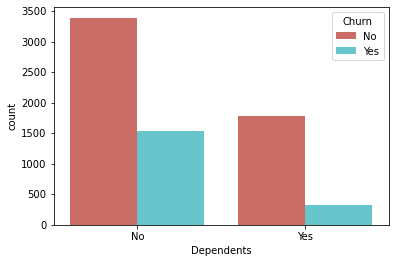

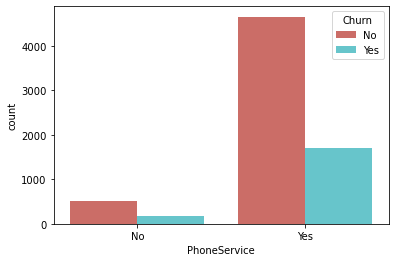

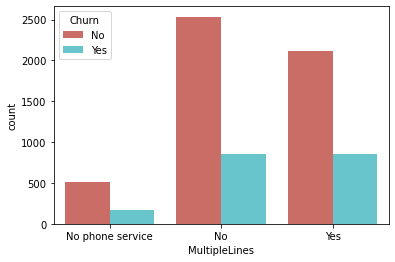

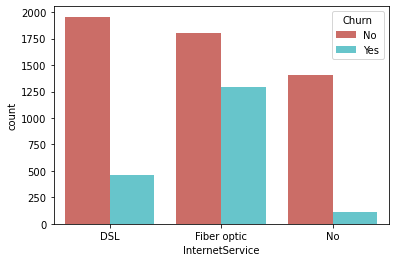

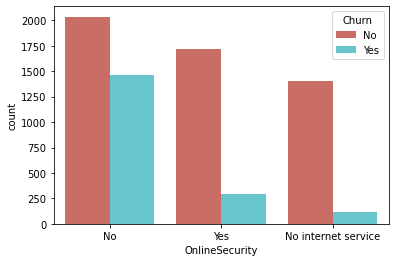

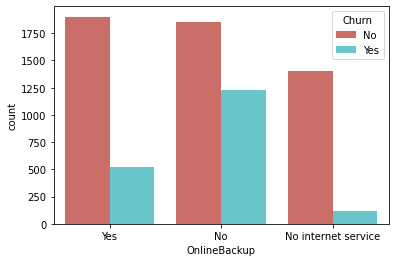

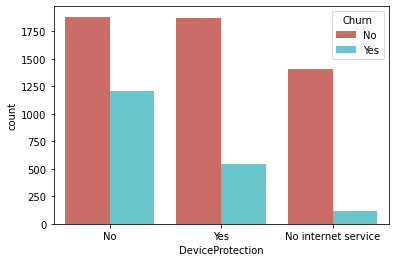

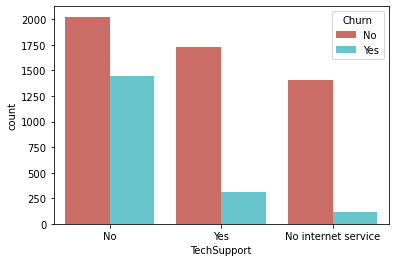

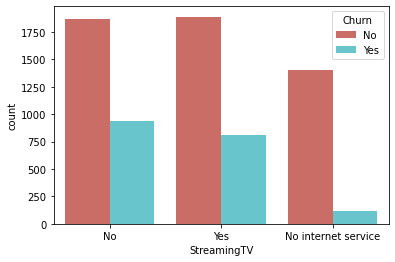

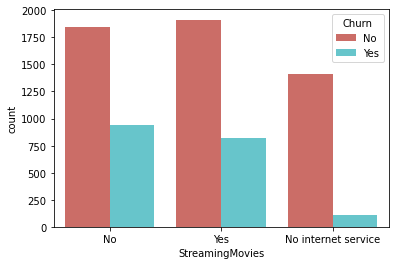

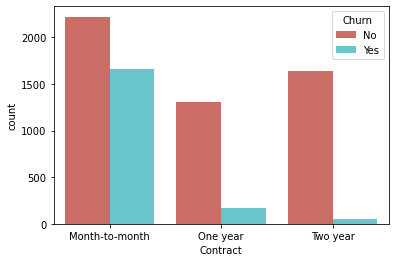

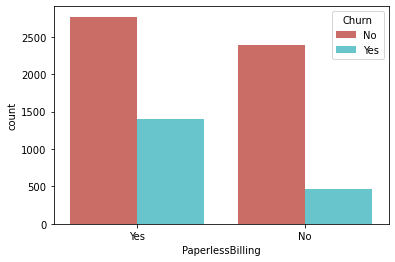

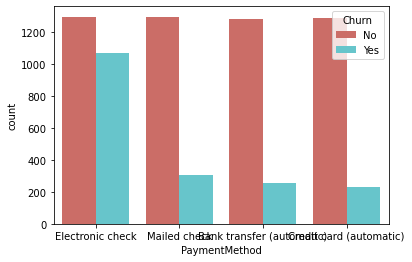

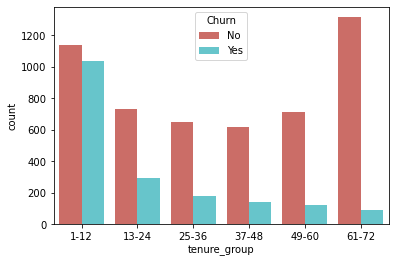

In [26]:
for i,predictor in enumerate(telco_df_copy.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_df_copy, x=predictor,hue='Churn',palette='hls')

**2. Convert the target variable "Churn in a binery numeric variable i.e. Yes=1, No=0**

In [27]:
telco_df_copy['Churn']=np.where(telco_df_copy['Churn']=='Yes',1,0)

In [28]:
telco_df_copy

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13-24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61-72
7040,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1-12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1-12


**3. Convert all the categorical varibles into dummy variables**

In [29]:
telco_df_copy.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [30]:
telco_df_copy.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [31]:
telco_df_copy['gender']=pd.get_dummies(telco_df_copy['gender'], drop_first=True)
telco_df_copy['Partner']=pd.get_dummies(telco_df_copy['Partner'], drop_first=True)
telco_df_copy['Dependents']=pd.get_dummies(telco_df_copy['Dependents'], drop_first=True)
telco_df_copy['PhoneService']=pd.get_dummies(telco_df_copy['PhoneService'], drop_first=True)
telco_df_copy['PaperlessBilling']=pd.get_dummies(telco_df_copy['PaperlessBilling'], drop_first=True)

In [32]:
level1={'Yes':1,'No':2,'No internet service':3}
level2={'Electronic check':1,'Mailed check':2,'Bank transfer (automatic)':3,'Credit card (automatic)':4}
level3={'Month-to-month':1,'Two year':2,'One year':3}
level4={'Fiber optic':1,'DSL':2,'No':3}
level6={'Yes':1,'No':2,'No phone service':3}

In [33]:
telco_df_copy['MultipleLines']=telco_df_copy['MultipleLines'].map(level6)
telco_df_copy['OnlineSecurity']=telco_df_copy['OnlineSecurity'].map(level1)
telco_df_copy['OnlineBackup']=telco_df_copy['OnlineBackup'].map(level1)
telco_df_copy['DeviceProtection']=telco_df_copy['DeviceProtection'].map(level1)
telco_df_copy['TechSupport']=telco_df_copy['TechSupport'].map(level1)
telco_df_copy['StreamingTV']=telco_df_copy['StreamingTV'].map(level1)
telco_df_copy['StreamingMovies']=telco_df_copy['StreamingMovies'].map(level1)



In [34]:
telco_df_copy['Contract']=telco_df_copy['Contract'].map(level3)
telco_df_copy['PaymentMethod']=telco_df_copy['PaymentMethod'].map(level2)
telco_df_copy['InternetService']=telco_df_copy['InternetService'].map(level4)

In [35]:
telco_df_copy.tenure_group.value_counts()

1-12     2175
61-72    1407
13-24    1024
49-60     832
25-36     832
37-48     762
Name: tenure_group, dtype: int64

In [36]:
level5={'1-12':1,'13-24':2,'25-36':3,'37-48':4,'49-60':5,'61-72':6}
telco_df_copy['tenure_group']=telco_df_copy['tenure_group'].map(level5)

In [37]:
telco_df_copy.MultipleLines.value_counts()

2    3385
1    2967
3     680
Name: MultipleLines, dtype: int64

In [38]:
telco_df_copy

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,1,0,0,3,2,2,1,2,2,2,2,1,1,1,29.85,29.85,0,1
1,1,0,0,0,1,2,2,1,2,1,2,2,2,3,0,2,56.95,1889.50,0,3
2,1,0,0,0,1,2,2,1,1,2,2,2,2,1,1,2,53.85,108.15,1,1
3,1,0,0,0,0,3,2,1,2,1,1,2,2,3,0,3,42.30,1840.75,0,4
4,0,0,0,0,1,2,1,2,2,2,2,2,2,1,1,1,70.70,151.65,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,2,1,2,1,1,1,1,3,1,2,84.80,1990.50,0,2
7039,0,0,1,1,1,1,1,2,1,1,2,1,1,3,1,4,103.20,7362.90,0,6
7040,0,0,1,1,0,3,2,1,2,2,2,2,2,1,1,1,29.60,346.45,0,1
7041,1,1,1,0,1,1,1,2,2,2,2,2,2,1,1,2,74.40,306.60,1,1


In [39]:
telco_df_copy.OnlineSecurity.value_counts()

2    3497
1    2015
3    1520
Name: OnlineSecurity, dtype: int64

In [40]:
telco_df_copy.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
tenure_group        0
dtype: int64

**4. Relationship between Monthly Charges and Total Charges**

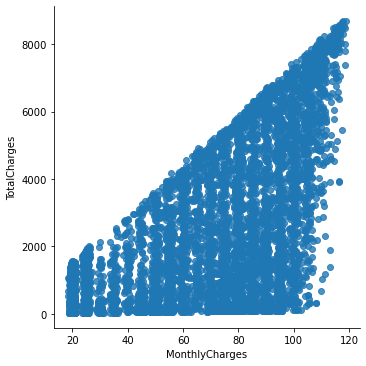

In [41]:
sns.lmplot(data=telco_df_copy, x='MonthlyCharges',y='TotalCharges', fit_reg=False)

**Total charges increase as Monthly charges increase-as expected.**

**5. Churn by MonthlyCharges and TotalCharges**

Text(0.5, 1.0, 'Monthly charges by churn')

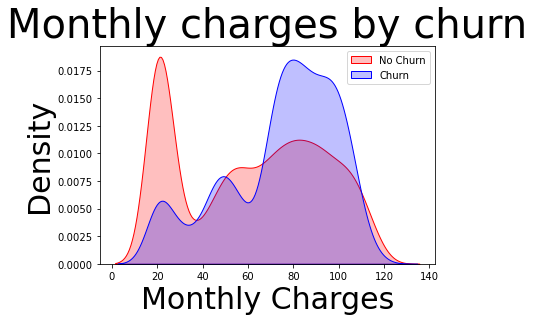

In [42]:
Mth=sns.kdeplot(telco_df_copy.MonthlyCharges[(telco_df_copy['Churn']==0)],
               color='Red',shade=True)
Mth=sns.kdeplot(telco_df_copy.MonthlyCharges[(telco_df_copy['Churn']==1)],
               color='Blue',shade=True)
Mth.legend(['No Churn','Churn'],loc='upper right')
Mth.set_xlabel('Monthly Charges',fontsize=30)
Mth.set_ylabel('Density',fontsize=30)
Mth.set_title('Monthly charges by churn',fontsize=40)

**Insight:** Churn is high when Monthly charges are high.

Text(0.5, 1.0, 'Total charges by churn')

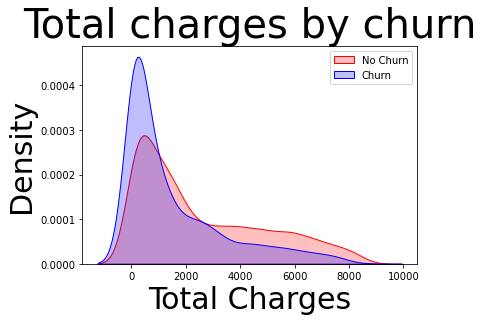

In [43]:
Mth=sns.kdeplot(telco_df_copy.TotalCharges[(telco_df_copy['Churn']==0)],
               color='Red',shade=True)
Mth=sns.kdeplot(telco_df_copy.TotalCharges[(telco_df_copy['Churn']==1)],
               color='Blue',shade=True)
Mth.legend(['No Churn','Churn'],loc='upper right')
Mth.set_xlabel('Total Charges',fontsize=30)
Mth.set_ylabel('Density',fontsize=30)
Mth.set_title('Total charges by churn',fontsize=40)

**Insight:** Higher Churn at lower Total Charges

**6. Build a corelation of all predictors with Churn**

<AxesSubplot:>

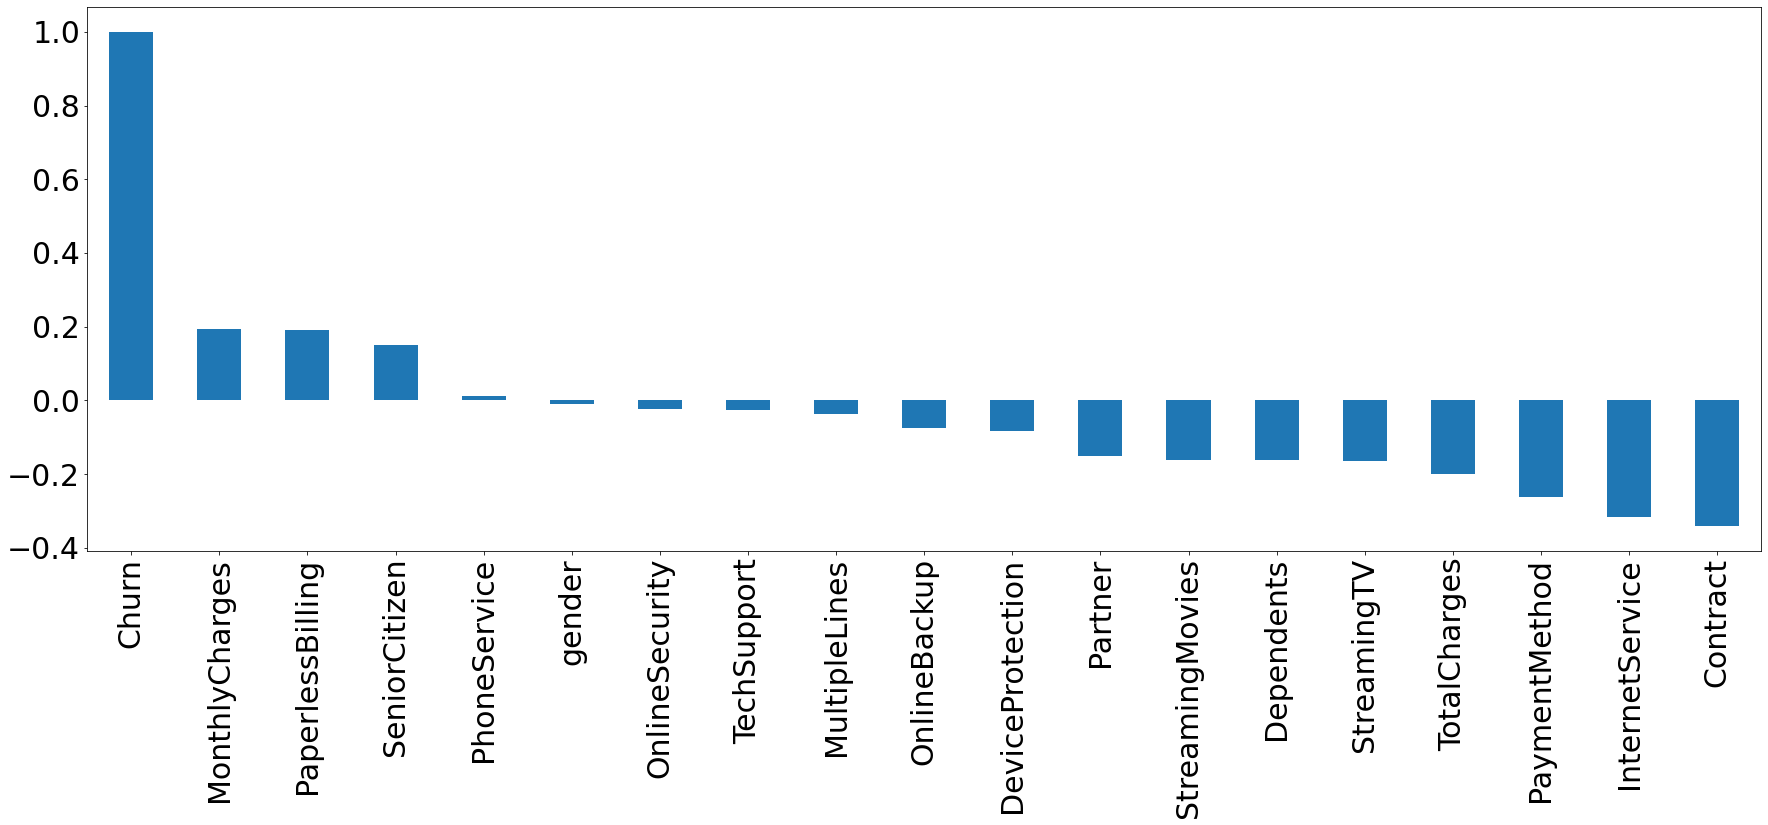

In [44]:
plt.figure(figsize=(30,10))
telco_df_copy.corr()['Churn'].sort_values(ascending=False).plot(kind='bar',fontsize=30)

### Insight:

**High** Churn is seen in case of **Month to month contracts,No online security,No Tech support,First year of subscription**,**Fiber Optics Internet,Electronic check payment method.**
**Low** Churn is seen in case of **Long term contracts,Subscriptions without internet service,The customers engaged for 5+ years,No internet service.**

Factors like **Gender, Availability of PhoneService and of multiple lines** have alomost NO impact on Churn.

This is also evident from the **Heatmap** below

<AxesSubplot:>

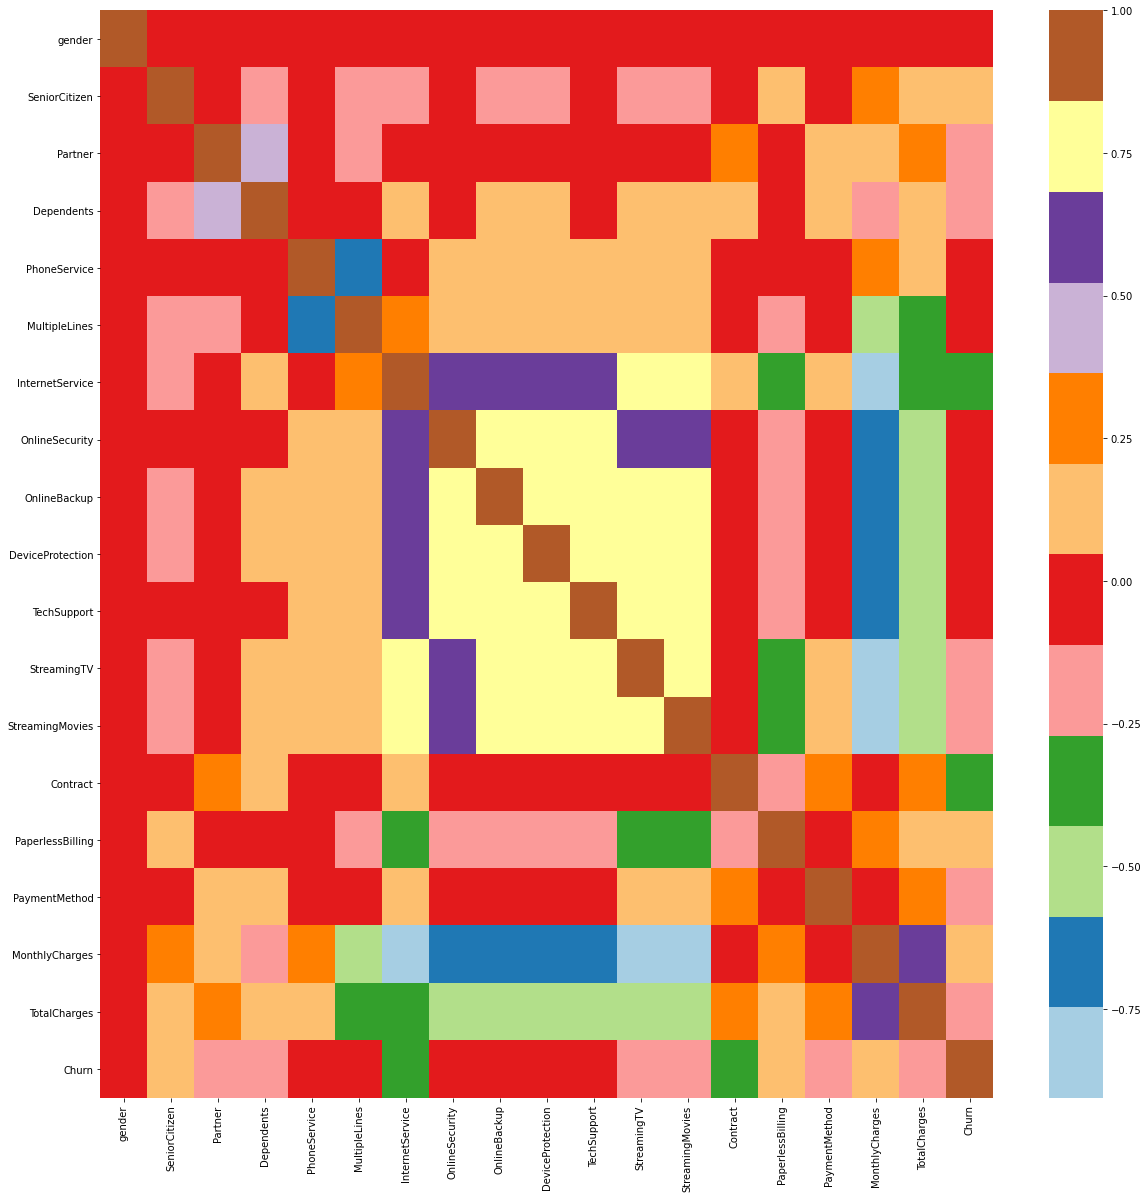

In [45]:
plt.figure(figsize=(20,20))
sns.heatmap(telco_df_copy.corr(),cmap='Paired')

### Bivariate Analysis

In [46]:
new_df_target0=telco_df_copy.loc[telco_df_copy['Churn']==0]
new_df_target1=telco_df_copy.loc[telco_df_copy['Churn']==1]

In [47]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='hls') 
        
    plt.show()

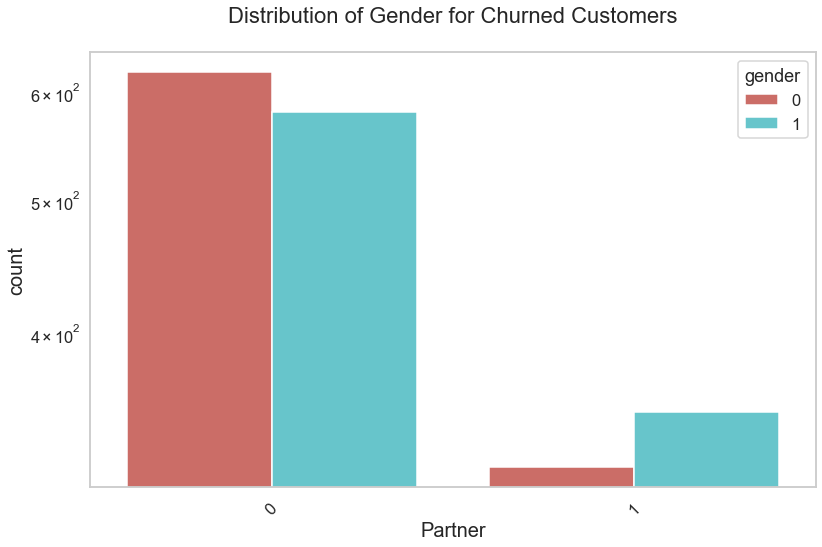

In [48]:
uniplot(new_df_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

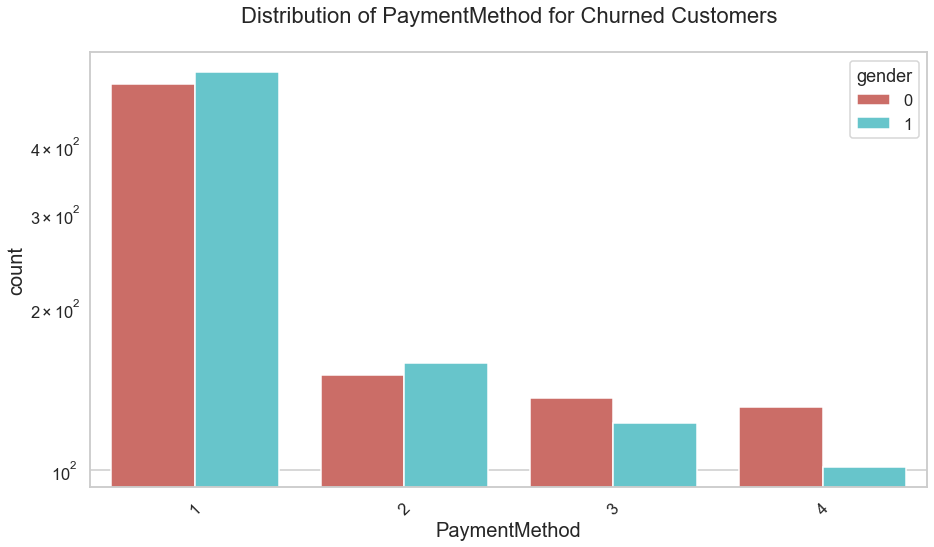

In [49]:
uniplot(new_df_target1, col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

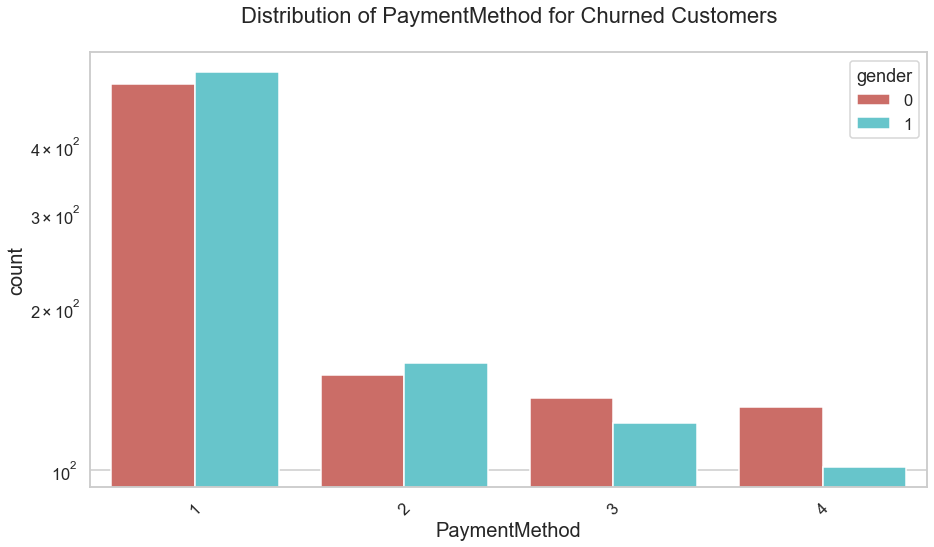

In [51]:
 uniplot(new_df_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

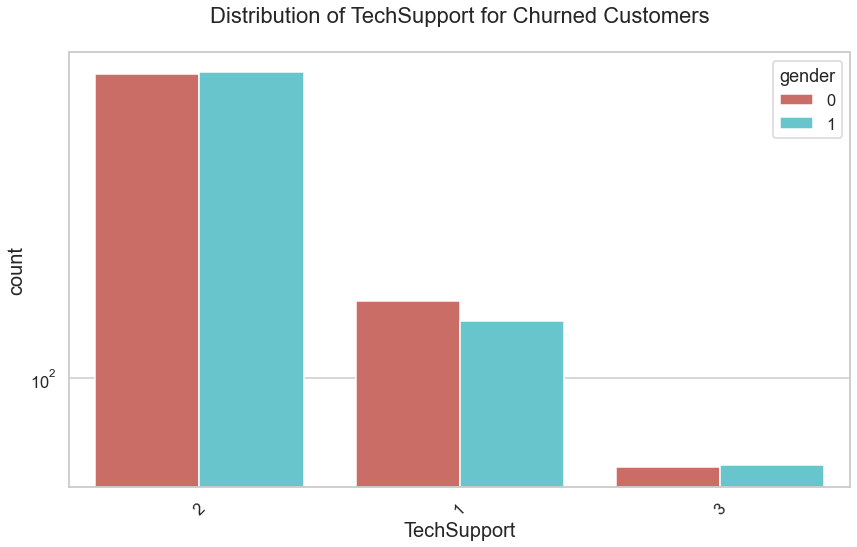

In [52]:
uniplot(new_df_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

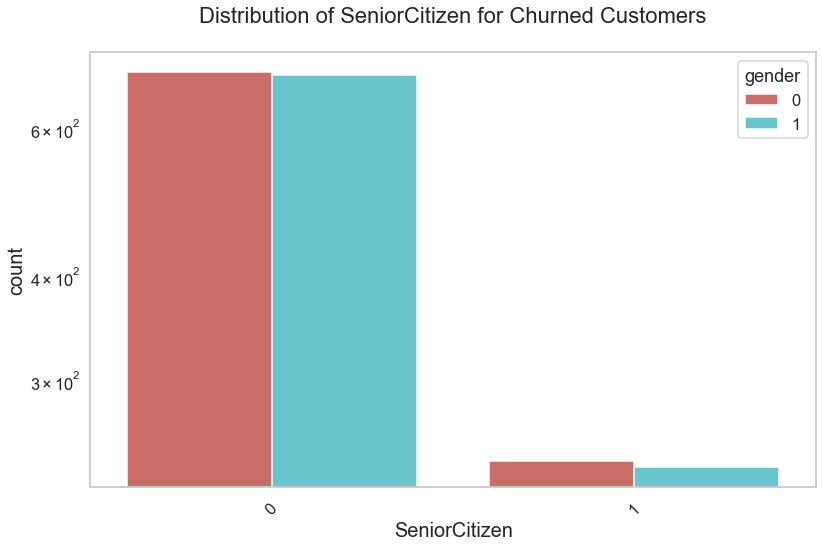

In [53]:
uniplot(new_df_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

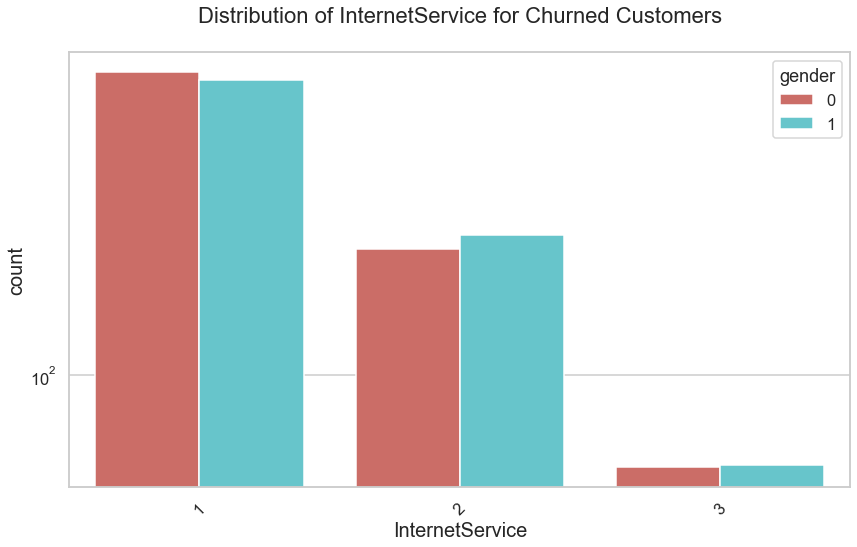

In [54]:
uniplot(new_df_target1,col='InternetService',title='Distribution of InternetService for Churned Customers',hue='gender')

# CONCLUSION:

**1. Electronic check medium are the high Churners.**

**2. Fiber optice Internet Service are more likely to churn.**

**3. Contract Type - Monthly customers are more likely to churn because of no        contract terms, as they are free to go customers.**

**4. No online security, No Tech Support category are high Churners**

**5. Non senior Citizens are high churners**

In [55]:
telco_df_copy.to_csv('tel_churn2.csv')

# Model Building

In [56]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn import *

In [57]:
#Reading csv
df_churn=pd.read_csv(r"C:\Users\ishita\Documents\ineuron ML\tel_churn2.csv")

In [58]:
df_churn.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,0,0,0,1,0,0,3,2,2,1,...,2,2,2,1,1,1,29.85,29.85,0,1
1,1,1,0,0,0,1,2,2,1,2,...,2,2,2,3,0,2,56.95,1889.50,0,3
2,2,1,0,0,0,1,2,2,1,1,...,2,2,2,1,1,2,53.85,108.15,1,1
3,3,1,0,0,0,0,3,2,1,2,...,1,2,2,3,0,3,42.30,1840.75,0,4
4,4,0,0,0,0,1,2,1,2,2,...,2,2,2,1,1,1,70.70,151.65,1,1


In [59]:
#Creating X & Y variables
X=df_churn.drop('Churn',axis=1)
X

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,tenure_group
0,0,0,0,1,0,0,3,2,2,1,2,2,2,2,1,1,1,29.85,29.85,1
1,1,1,0,0,0,1,2,2,1,2,1,2,2,2,3,0,2,56.95,1889.50,3
2,2,1,0,0,0,1,2,2,1,1,2,2,2,2,1,1,2,53.85,108.15,1
3,3,1,0,0,0,0,3,2,1,2,1,1,2,2,3,0,3,42.30,1840.75,4
4,4,0,0,0,0,1,2,1,2,2,2,2,2,2,1,1,1,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,7038,1,0,1,1,1,1,2,1,2,1,1,1,1,3,1,2,84.80,1990.50,2
7028,7039,0,0,1,1,1,1,1,2,1,1,2,1,1,3,1,4,103.20,7362.90,6
7029,7040,0,0,1,1,0,3,2,1,2,2,2,2,2,1,1,1,29.60,346.45,1
7030,7041,1,1,1,0,1,1,1,2,2,2,2,2,2,1,1,2,74.40,306.60,1


In [60]:
X.columns

Index(['Unnamed: 0', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'tenure_group'],
      dtype='object')

In [61]:
X.isnull().sum()

Unnamed: 0          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
tenure_group        0
dtype: int64

In [62]:
Y=df_churn['Churn']
Y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

In [63]:
#Splitting dataset
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

### Decision Tree Classifier

In [64]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [65]:
clf.score(x_train,y_train)

1.0

In [66]:
y_pred=clf.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

In [67]:
clf.score(x_test,y_test)

0.7221037668798863

Result is not so good I'll do **hyperparameter tunning**

In [68]:
grid_param= {
              'criterion':['gini','entropy'],
               'max_depth': range(8,32,1),
               'min_samples_leaf': range(1,10,1),
            'min_samples_split': range(2,10,1),
             'splitter': ['best','random']
}

In [69]:
grid_search=GridSearchCV(estimator=clf,param_grid= grid_param,cv=5, n_jobs=-1)

In [70]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(8, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [71]:
best_parameters=grid_search.best_params_
best_parameters

{'criterion': 'gini',
 'max_depth': 8,
 'min_samples_leaf': 8,
 'min_samples_split': 6,
 'splitter': 'random'}

In [72]:
clf=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=8, min_samples_split=4,splitter= 'random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=8, min_samples_split=4,
                       splitter='random')

In [73]:
clf.score(x_test,y_test)

0.783226723525231

In [74]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1035
           1       0.48      0.52      0.50       372

    accuracy                           0.72      1407
   macro avg       0.65      0.66      0.65      1407
weighted avg       0.73      0.72      0.73      1407



###### As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

###### Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.

###### Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [75]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN()
X_resampled,y_resampled=sm.fit_resample(X,Y)

In [76]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [77]:
model_dt_smote=DecisionTreeClassifier(criterion='gini',max_depth=8,min_samples_leaf=9, min_samples_split=7,splitter= 'random')

In [78]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(classification_report(yr_test, yr_predict))

0.8843058350100603
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       431
           1       0.90      0.90      0.90       563

    accuracy                           0.88       994
   macro avg       0.88      0.88      0.88       994
weighted avg       0.88      0.88      0.88       994



In [79]:
print(confusion_matrix(yr_test, yr_predict))

[[375  56]
 [ 59 504]]


###### Now we can see quite better results, i.e. Accuracy: 94%, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

### Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [81]:
rand_clf=RandomForestClassifier(random_state=6)

In [82]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(random_state=6)

In [83]:
rand_clf.score(x_test,y_test)

0.7981520966595593

#### Hyperparamerer Tunning

In [84]:
rand_clf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [85]:
rand_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [86]:
y_pred=rand_clf.predict(x_test)

In [87]:
rand_clf.score(x_test,y_test)

0.7974413646055437

In [88]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1035
           1       0.68      0.44      0.53       372

    accuracy                           0.80      1407
   macro avg       0.75      0.68      0.70      1407
weighted avg       0.78      0.80      0.78      1407



In [89]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,Y)

In [90]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [91]:
rand_clf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [92]:
rand_clf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [93]:
yr_predict1 = rand_clf_smote.predict(xr_test1)

In [94]:
model_score_r1 = rand_clf_smote.score(xr_test1, yr_test1)

In [95]:
print(model_score_r1)
print(classification_report(yr_test1, yr_predict1))

0.8959183673469387
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       407
           1       0.90      0.92      0.91       573

    accuracy                           0.90       980
   macro avg       0.89      0.89      0.89       980
weighted avg       0.90      0.90      0.90       980



## Gredient Boosting Classifier

In [96]:
#param grid
#I have limit max_depth to 8 so that the model doesn't overfit
param = { 'min_samples_split' : [5,10,30,50],'max_depth' : [3,5,7,8]}

GBDTclf = GradientBoostingClassifier()

clf = GridSearchCV(GBDTclf,param,cv=5,refit=False,return_train_score=True,scoring='roc_auc')
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 5, 7, 8],
                         'min_samples_split': [5, 10, 30, 50]},
             refit=False, return_train_score=True, scoring='roc_auc')

In [97]:
clf.best_params_

{'max_depth': 3, 'min_samples_split': 50}

In [98]:
GBT_clf=GradientBoostingClassifier(max_depth=3,min_samples_split=50)

In [99]:
GBT_clf.fit(x_train,y_train)

GradientBoostingClassifier(min_samples_split=50)

In [100]:
y_pred=GBT_clf.predict(x_test)

In [101]:
GBT_clf.score(x_test,y_test)

0.8088130774697939

In [102]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1035
           1       0.68      0.52      0.59       372

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [103]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,Y)

In [104]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [105]:
GBT_clf_smote=GradientBoostingClassifier(max_depth=3, min_samples_split=30)

In [106]:
GBT_clf_smote.fit(xr_train1,yr_train1)

GradientBoostingClassifier(min_samples_split=30)

In [107]:
yr_predict1 = GBT_clf_smote.predict(xr_test1)

In [108]:
model_score_GBT = GBT_clf_smote.score(xr_test1, yr_test1)

In [109]:
print(model_score_GBT)
print(classification_report(yr_test1, yr_predict1))

0.9040404040404041
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       457
           1       0.90      0.92      0.91       533

    accuracy                           0.90       990
   macro avg       0.90      0.90      0.90       990
weighted avg       0.90      0.90      0.90       990



In [110]:
print(confusion_matrix(yr_test1, yr_predict1))

[[403  54]
 [ 41 492]]


###### Now we can see quite better results, i.e. Accuracy: 95%, and a very good recall, precision & f1 score for minority class.

## Conclusion

##### My final model i.e. GredientBoostingClassifier with SMOTEENN.

### Save Model

In [99]:
import pickle
filename='churn_model_final.sav'

In [100]:
pickle.dump(GBT_clf_smote, open(filename, 'wb'))

In [101]:
load_model = pickle.load(open(filename, 'rb'))

In [94]:
model_score_r1 = load_model.score(xr_test1, yr_test1)

In [95]:
model_score_r1

0.9462272333044233